# Time Delay Example
### The Pad´e-approximation of a time delay

The transfer function of a time delay is
$$ e^{-T_d s} $$

where T<sub>d</sub> is the time delay. In the Python Control Package, there is no function to you can not define this s-transfer function (while this is straightforward for z-transfer function). However, you can use the control.pade() function to generate an Pade-approximation of the time delay.

In [23]:
import scipy
import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *  # MATLAB-like functions
import numpy as np

In [24]:
# Parameters
Rs = 0.16
Ls = 0.00015


       1
----------------
0.00015 s + 0.16



In [ ]:
# System transfer function
Gs = tf(1, [Ls, Rs])

print(Gs)

**Pad´e-approximation of a time delay**

In [37]:
Td = 0.001
n_pade = 10
num_pade, den_pade = pade(Td, n_pade)
H_pade = tf(num_pade, den_pade)

Gsd = series(Gs, H_pade)

### Compare the step response with delay

C:\Users\jimchen.AATECH\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=8.20125e-72): result may not be accurate.
  return solve(Q, P)


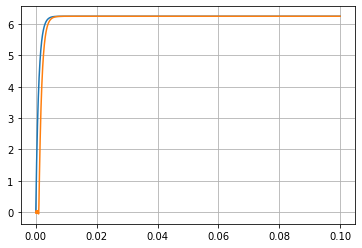

In [34]:
t = np.arange(0, 0.1, 1e-6)
yout, T = step(Gs, t)
plt.plot(T.T, yout.T)

yout, T = step(Gsd, t)
plt.plot(T.T, yout.T)

plt.grid()
plt.show()

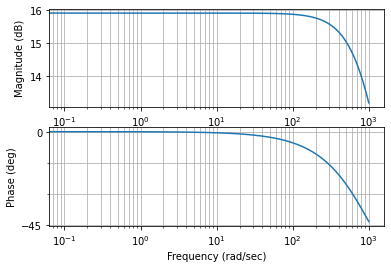

In [35]:
w = np.arange(0, 1e3, 0.1)
mag, phase, om = bode(Gs, w)


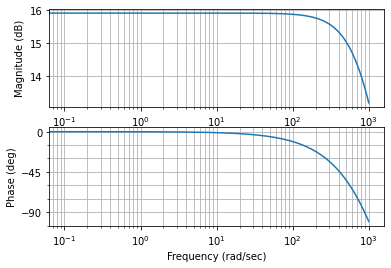

In [36]:
mag, phase, om = bode(Gsd, w)